# Setup


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Caricamento dati

In [9]:
df = pd.read_csv("../data/raw/all-data.csv", encoding='latin1', names=['label', 'text'])
df.head()

,label,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


## Descrizione del Dataset

Il dataset che stiamo utilizzando per la nostra analisi è un insieme di frasi classificate in tre categorie sentimentali: **positivo**, **negativo** e **neutrale**. Le frasi sono estratte da varie fonti e sono etichettate in base al tono espresso nei loro contenuti.

### Motivazioni:
- **Utilizzo**: Il dataset è utilizzato per costruire un modello di **sentiment analysis**. L'obiettivo è predire il sentimento (positivo, negativo o neutro) di un dato testo.
- **Dimensione**: Il dataset contiene **4,846 frasi** classificate, di cui:
  - **Classe neutrali**: 2879 esempi
  - **Classe positiva**: 1363 esempi
  - **Classe negativa**: 604 esempi

# EDA DATASET ORIGINALE

## Distribuzione delle classi (neural-negative-positive)

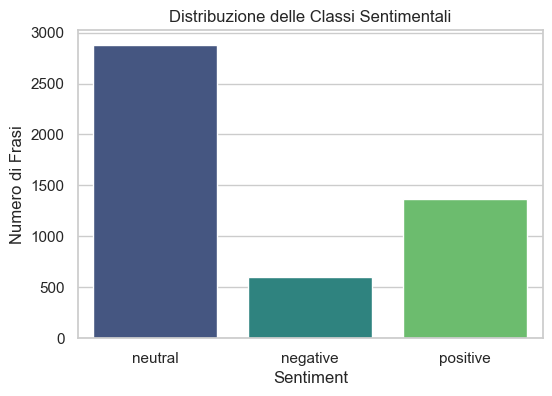

La classe 'neutral' ha 2879 frasi.
La classe 'positive' ha 1363 frasi.
La classe 'negative' ha 604 frasi.


In [9]:
sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label', hue='label', palette='viridis')  # OK
plt.title("Distribuzione delle Classi Sentimentali")
plt.xlabel("Sentiment")
plt.ylabel("Numero di Frasi")
plt.show()
class_counts = df['label'].value_counts()
for label, count in class_counts.items():
    print(f"La classe '{label}' ha {count} frasi.")



La distribuzione delle classi sentimentali nel dataset mostra uno squilibrio tra le diverse categorie. In particolare:
- La classe **neutrale** è la più rappresentata, con *]2879 esempi**.
- La classe **positiva** conta circa **1363 esempi**.
- La classe **negativa** è la meno rappresentata, con circa **604 esempi**.

### Motivazioni:
- Questo squilibrio potrebbe portare a un **bias** nel modello, dove la classe **neutrale** viene predetta più frequentemente rispetto alle altre. Per risolvere questo problema, possiamo adottare tecniche di bilanciamento.

### Soluzioni:
- Tecniche di **oversampling** (come **SMOTE**) per aumentare il numero di esempi nelle classi **negative** e **positive**.
- **Under-sampling** della classe **neutrale** per evitare che la classe più rappresentata domini il modello.


## Analisi della distribuzione delle lunghezze delle frasi


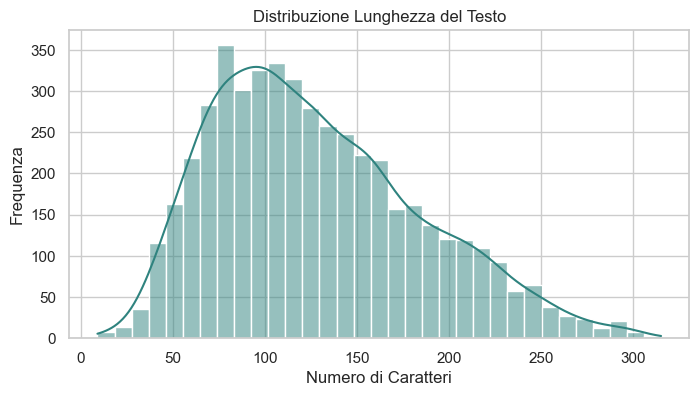

Statistiche sulla lunghezza delle frasi:
Media della lunghezza delle frasi: 128.13
Mediana della lunghezza delle frasi: 119.0
Lunghezza minima delle frasi: 9
Lunghezza massima delle frasi: 315


In [10]:
df['text_len'] = df['text'].apply(len)

plt.figure(figsize=(8,4))
sns.histplot(df['text_len'], kde=True, color='#2f837f')
plt.title("Distribuzione Lunghezza del Testo")
plt.xlabel("Numero di Caratteri")
plt.ylabel("Frequenza")
plt.show()
print("Statistiche sulla lunghezza delle frasi:")
print(f"Media della lunghezza delle frasi: {df['text_len'].mean():.2f}")
print(f"Mediana della lunghezza delle frasi: {df['text_len'].median()}")
print(f"Lunghezza minima delle frasi: {df['text_len'].min()}")
print(f"Lunghezza massima delle frasi: {df['text_len'].max()}")


Il dataset presenta una varianza interessante nella lunghezza delle frasi. Le lunghezze delle frasi **variano significativamente**, con la lunghezza media che si attesta attorno a **128 caratteri** e la mediana che è pari a **119 caratteri**. La lunghezza minima è di 9 caratteri, mentre la lunghezza massima arriva a 315 caratteri.

Questi valori suggeriscono che la maggior parte delle frasi tende a essere di lunghezza moderata, ma **ci sono alcuni testi brevi e alcuni testi molto lunghi**.
### Outlier nella lunghezza
- La lunghezza massima di 315 caratteri indica che alcune frasi potrebbero essere molto lunghe rispetto alla media del dataset. Questi outlier potrebbero distorcere la distribuzione dei dati e influenzare negativamente la performance del modello di sentiment analysis.
### Motivazione
 - I testi molto lunghi potrebbero non essere rappresentativi di come il modello dovrà affrontare i dati reali (dove i testi sono spesso più brevi). Inoltre, frasi troppo lunghe potrebbero risultare più complesse da processare per alcuni modelli di machine learning.


## Boxplot per la lunghezza delle frasi (in numero di caratteri)


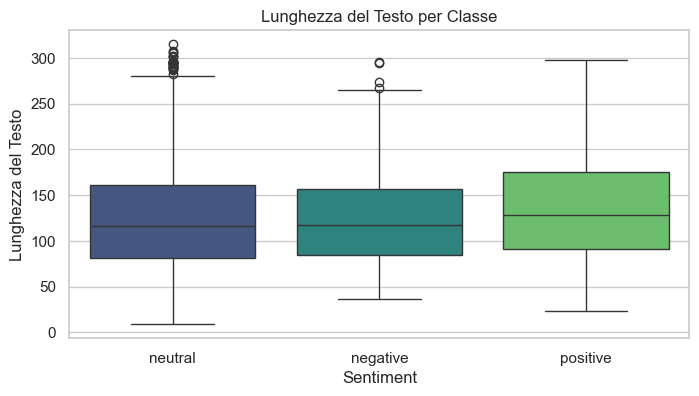


Classe: neutral
Numero di outlier: 28
Media: 125.07
Mediana: 116.0
Min: 9
Max: 315

Classe: negative
Numero di outlier: 4
Media: 125.76
Mediana: 118.0
Min: 37
Max: 296

Classe: positive
Numero di outlier: 0
Media: 135.65
Mediana: 128.0
Min: 24
Max: 298


In [11]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='label', hue='label',y='text_len', palette='viridis')
plt.title("Lunghezza del Testo per Classe")
plt.xlabel("Sentiment")
plt.ylabel("Lunghezza del Testo")
plt.show()


for label in df['label'].unique():
    subset = df[df['label'] == label]
    Q1 = subset['text_len'].quantile(0.25)
    Q3 = subset['text_len'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    label_outliers = subset[(subset['text_len'] < lower_bound) | (subset['text_len'] > upper_bound)]

    print(f"\nClasse: {label}")
    print(f"Numero di outlier: {label_outliers.shape[0]}")
    print(f"Media: {subset['text_len'].mean():.2f}")
    print(f"Mediana: {subset['text_len'].median()}")
    print(f"Min: {subset['text_len'].min()}")
    print(f"Max: {subset['text_len'].max()}")



Il boxplot visualizza la distribuzione dei dati, mostrando i quartili, la mediana e gli **outlier**. Questo strumento è utile per osservare come la lunghezza delle frasi varia tra le diverse classi di sentiment (positivo, negativo, neutrale) e per identificare eventuali valori anomali.

### Motivazione

- La classe **"neutral"** presenta un numero maggiore di **outlier**, con 28 frasi che sono significativamente più lunghe o più corte rispetto alla distribuzione principale.
- Le classi **"negative"** e **"positive"** hanno rispettivamente 2 e 5 outlier, indicando una distribuzione meno variabile in termini di lunghezza delle frasi.
- La lunghezza delle frasi nelle classi **positive** sembra essere mediamente più lunga rispetto alle altre due classi, come indicato dai quartili superiori.

## Word Cloud prima del Preprocessing (Intero Dataset)

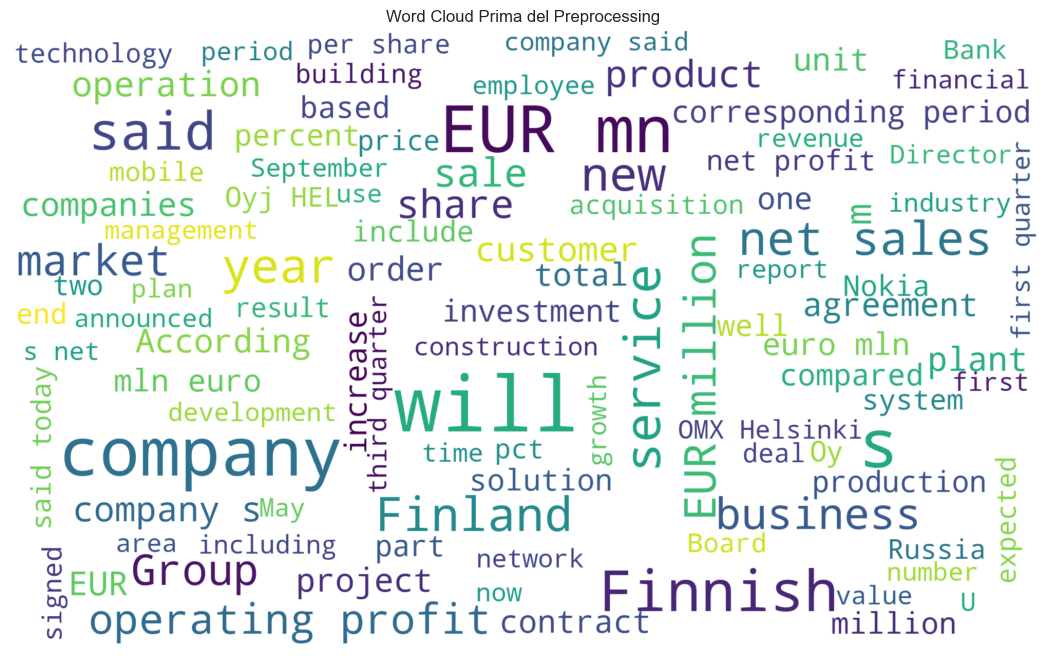

In [12]:
all_text = ' '.join(df['text'])
wordcloud = WordCloud(width=2000, height=1200, max_words=100, max_font_size=150, background_color='white').generate(all_text)

plt.figure(figsize=(18, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Prima del Preprocessing")
plt.show()


## Analisi della frequenza delle parole grezze

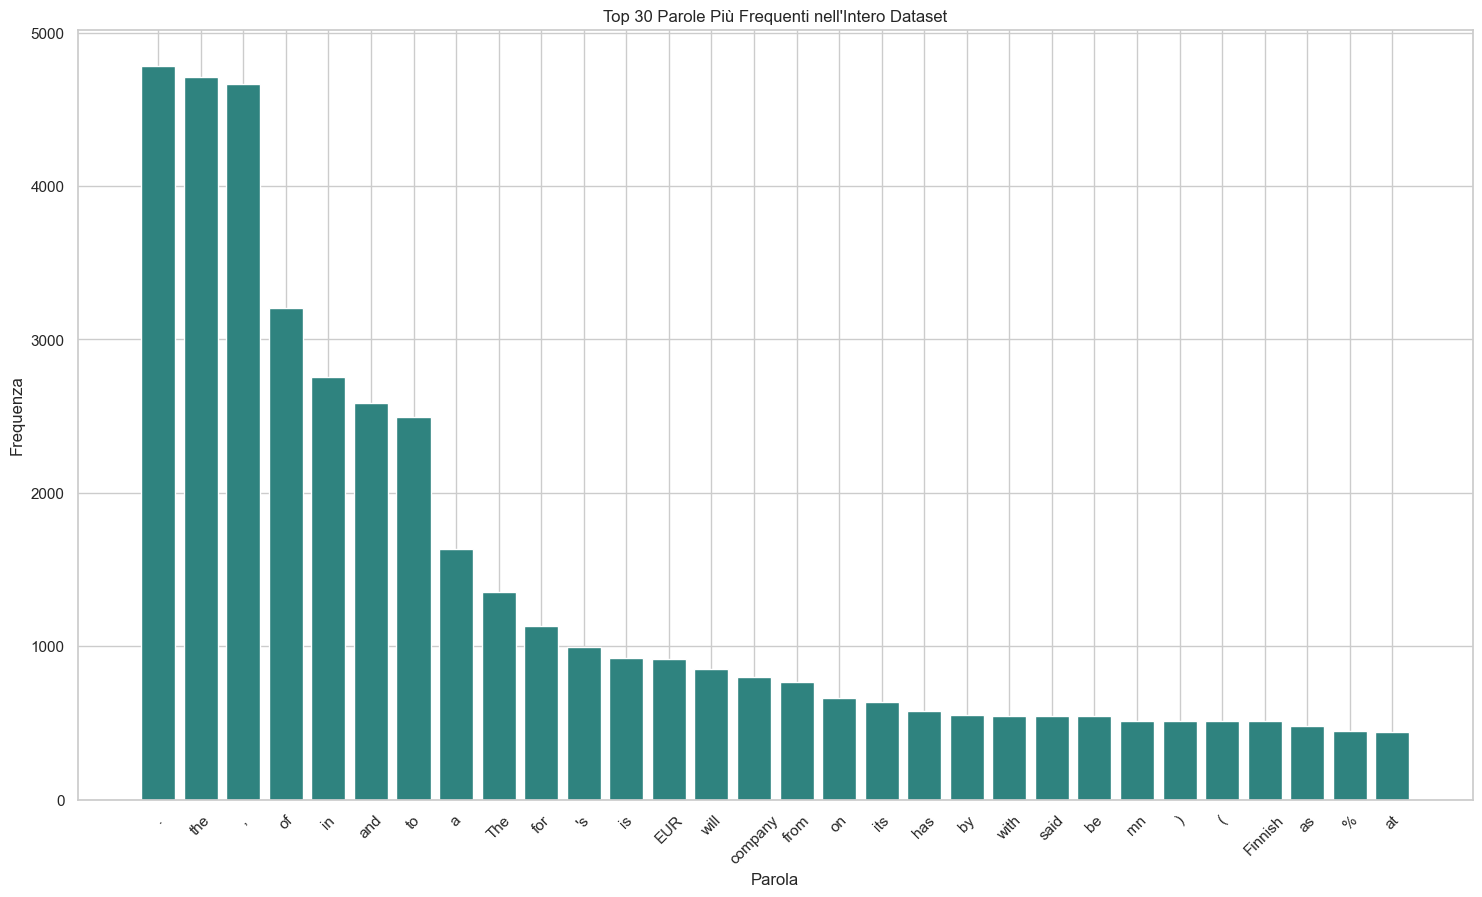

In [13]:

from collections import Counter

# Conta la frequenza delle parole nel dataset completo
all_words = ' '.join(df['text'])
word_counts = Counter(all_words.split())

# Le 30 parole più frequenti
common_words = word_counts.most_common(30)

# Dividi le parole e le loro frequenze
words, counts = zip(*common_words)

# Creiamo il grafico a barre
plt.figure(figsize=(18, 10))
plt.bar(words, counts, color='#2f837f')
plt.title("Top 30 Parole Più Frequenti nell'Intero Dataset")
plt.xlabel("Parola")
plt.ylabel("Frequenza")
plt.xticks(rotation=45)
plt.show()
